In [1]:
run ../data_utils.py

In [2]:
import pandas as pd
import numpy as np

In [3]:
def tables_from_category(category):
    with open('../..//data/%s.pickle' % category, 'rb') as f:
        return pickle.load(f)

qa_table, reviews_table = tables_from_category(VIDEO_GAMES)

In [4]:
qa_table.head()

,answerScore,answerText,answerType,answererID,asin,askerID,questionText,questionType
0,None,"Yes, you will need to go to their website to d...",None,AH14F9TYDABNH,B0000512IE,A39TQ7XW6P36BU,Can I use these with Window 8/8.1?,open-ended
1,None,Sure can. My Windows 8.1 machine automatically...,None,A36BQQD67VJOD2,B0000512IE,A39TQ7XW6P36BU,Can I use these with Window 8/8.1?,open-ended
2,None,"Mine work with W8, can't answer for W8.1 but s...",None,AZY7TFN31JV8M,B0000512IE,A39TQ7XW6P36BU,Can I use these with Window 8/8.1?,open-ended
3,None,Yes. I installed on windows 8 and had no problems,None,A1RU4ZCFMLYY9E,B0000512IE,A39TQ7XW6P36BU,Can I use these with Window 8/8.1?,open-ended
4,None,I don't see why not. I don't use the CH driver...,None,A223O8W9Q7VLAE,B0000512IE,A39TQ7XW6P36BU,Can I use these with Window 8/8.1?,open-ended


In [6]:
# Number of Products
num_products = len(np.unique(qa_table.asin))

# Number of questions
question_table = qa_table[['asin', 'questionText', 'questionType']].drop_duplicates()
num_questions = len(question_table)
vc = question_table['questionType'].value_counts()
num_yes_no, num_oe = vc['yes/no'], vc['open-ended']

# Number of answers
num_answers = len(qa_table)

# Number of reviews
num_reviews = len(reviews_table)

# Per product
avg_reviews = reviews_table.groupby(['asin']).count()['reviewText'].mean()

In [7]:
# Token Counts for Reviews, Review Counts for products

def token_count(line):
    return len(line.split(' '))

review_count_df = pd.concat([reviews_table.asin, reviews_table.reviewText.apply(token_count)], axis = 1)
avg_review_token_count_per_product = review_count_df.groupby(['asin']).sum().mean()
avg_review_token_count = review_count_df.reviewText.mean(), 
avg_review_count = review_count_df.groupby(['asin']).count().mean()

In [29]:
# Avg question per product & answers per question

avg_questions_per_product = qa_table[['asin', 'questionText']].drop_duplicates().groupby('asin')['questionText'].count().mean()
avg_answers_per_question = qa_table.groupby(['questionText']).count()['answerText'].mean()

In [30]:
# Duplicate Questions

df = question_table.groupby(['questionText']).count()
df[df.asin > 9]
question_table[question_table.questionText == '- Does this game have multiplayer mode?']

,asin,questionText,questionType
2311,B00269DXXO,- Does this game have multiplayer mode?,open-ended
3729,B00ECOBFA4,- Does this game have multiplayer mode?,open-ended
18500,B00CD90R4K,- Does this game have multiplayer mode?,open-ended
20157,B009CEM332,- Does this game have multiplayer mode?,open-ended


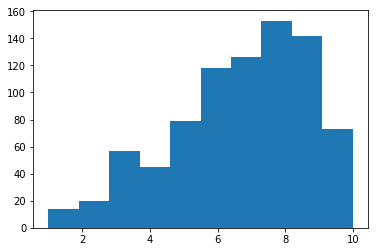

In [31]:
# Category Level Analysis
import matplotlib.pyplot as plt

plt.hist(question_table.groupby(['asin']).count()['questionText'])
# question_table.groupby(['asin']).count()['questionText'].plot(kind='bar')
plt.show()

In [38]:
run ../data_utils.py

In [40]:
data_stats = data_stats()

In [46]:
data_stats.sort_values(['Num Products'], ascending=False)

,Num Products,Num Questions,Num Answers,Num Yes/No Questions,Num Open Ended Questions,Num Reviews,Avg Reviews Per Product,Avg Questions Per Product,Avg Answers Per Question,Num Duplicate Questions
Home_and_Kitchen,10915,75948,322567,8828,67120,326388,29.902703,6.958131,4.528782,1790
Sports_and_Outdoors,5971,41178,167568,6610,34568,143742,24.073355,6.896332,4.169188,580
Health_and_Personal_Care,5455,35658,145711,4284,31374,148834,27.283960,6.536755,4.318899,925
Tools_and_Home_Improvement,4149,30008,122952,4045,25963,70986,17.109183,7.232586,4.169560,345
Cell_Phones_and_Accessories,3607,23960,97774,4996,18964,105134,29.147214,6.642639,4.155468,278
Toys_and_Games,2834,17207,67270,2286,14921,60874,21.479887,6.071630,4.055830,296
Beauty,2523,15941,62357,2238,13703,62627,24.822434,6.318272,4.088447,434
Pet_Supplies,2208,15639,69108,1780,13859,66251,30.004982,7.082880,4.567614,303
Baby,1880,12011,45430,1290,10721,75465,40.140957,6.388830,3.899571,245
Grocery_and_Gourmet_Food,1345,7912,33059,813,7099,30764,22.872862,5.882528,4.380416,180
